## Artificial Intelligence (BSc) SA 2023-2024

- Prof. Luca Gambardella
- Fatima Ezzeddine ([`fatima.ezzeddine@usi.ch`](mailto:fatima.ezzeddine@usi.ch))<br>

---

## Third Lab

What we are going to do today:
- Introduce two optimizers for local search methods
- Use the optimizer with the methods defined before

This cell below is simply importing some useful stuff for later

In [1]:
import glob
import numpy as np
from matplotlib import pyplot as plt
from time import time as t
from utils import compute_length, ProblemInstance, SolverTSP

## Optimizers
### 2opt
As we saw last time, we have 12 problems and two have an optimal solution

## Solution

In [2]:
import numpy as np

def step2opt(solution, matrix_dist, distance):
  seq_length = len(solution)
  tsp_sequence = np.array(solution)
  # TODO
  for i in range(seq_length):
    for j in range(i + 1, seq_length): #(i+ 1) because we do not want i=j, also if we put j before i, and we have a symetric case, we do not have to put j less than i we have the same swaps, so now the cases are divided by 2
      if gain(i, j, tsp_sequence, matrix_dist) > 0:
        # update new distance
        new_distance = distance - gain(i, j, tsp_sequence, matrix_dist)
        # swap the tour
        tsp_sequence = swap2opt(tsp_sequence, i, j)
        # return new tour, and new instance
        return tsp_sequence, new_distance, 1
  # END TODO
  return tsp_sequence, distance, 1


def swap2opt(tsp_sequence, i, j):
  # TODO
  n = len(tsp_sequence)
  new_tsp_sequence = np.copy(tsp_sequence)
  # flipping the part between i and j+1
  new_tsp_sequence[i:j + 1 - n] = np.flip(tsp_sequence[i:j + 1 -n], axis=0)  
  # END TODO
  return new_tsp_sequence


def gain(i, j, tsp_sequence, matrix_dist):
  n = matrix_dist.shape[0]
  old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + 
                  matrix_dist[tsp_sequence[j], tsp_sequence[j + 1 - n]])
  
  changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + 
                       matrix_dist[tsp_sequence[i], tsp_sequence[j + 1 - n]])
  
  return + old_link_len - changed_links_len

#while loop, calling step2opt until the new solution is shorter (an imoprovment)
# when the new solution is smaller than the previous one then you keep going in the while
# if this is not true, we return the solution we found
def loop2opt(solution, instance, max_num_of_uncrosses=10000):
    matrix_dist = instance.dist_matrix
    new_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    try_again = True
    seq_length = new_len
    # TODO
    while uncross < max_num_of_uncrosses:
      new_tsp_sequence, new_reward, uncr_ = step2opt(new_tsp_sequence, matrix_dist, new_len)
      new_tsp_sequence = np.roll(new_tsp_sequence, np.random.randint(seq_length))
      if new_reward < new_len:
        new_len = new_reward
        try_again = True
        uncross += uncr_
      else:
        if try_again:
          try_again = False
        else:
          return new_tsp_sequence.tolist(), new_len, uncross
    # END TODO
    return new_tsp_sequence.tolist(), new_len, uncross
    

#### Let's test it


#############################

name: eil76
nPoints: 76
best_sol: 538.0
exist optimal: True


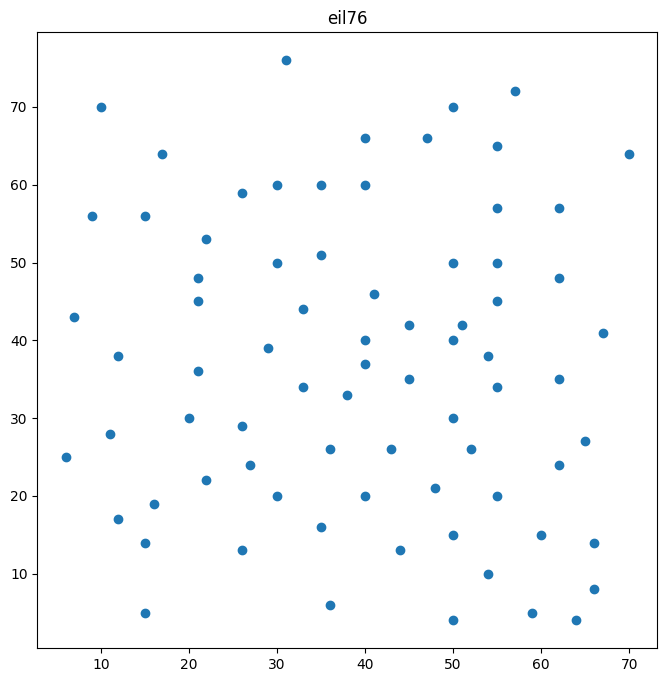

In [3]:
example_problem = "./problems/eil76.tsp"
p_inst = ProblemInstance(example_problem)
p_inst.print_info()
p_inst.plot_data()

In [4]:
from constructive import (
    random_method,
    nearest_neighbor,
    best_nearest_neighbor,
    multi_fragment_mf
)

available_solvers = {
    "random": random_method,
    "nn":nearest_neighbor,
    "best_nn":best_nearest_neighbor,
    "multi_fragment": multi_fragment_mf
}

###  solving with nn  ####
###  solved  ####


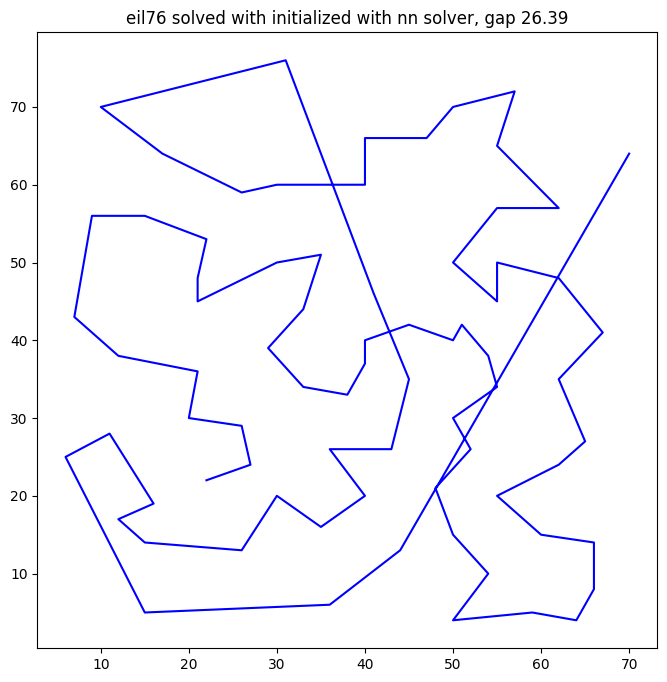

best solution with len 680.0 
with a total time of 0.00316 seconds
solution found has a 26.39 % gap
2.264460325241089


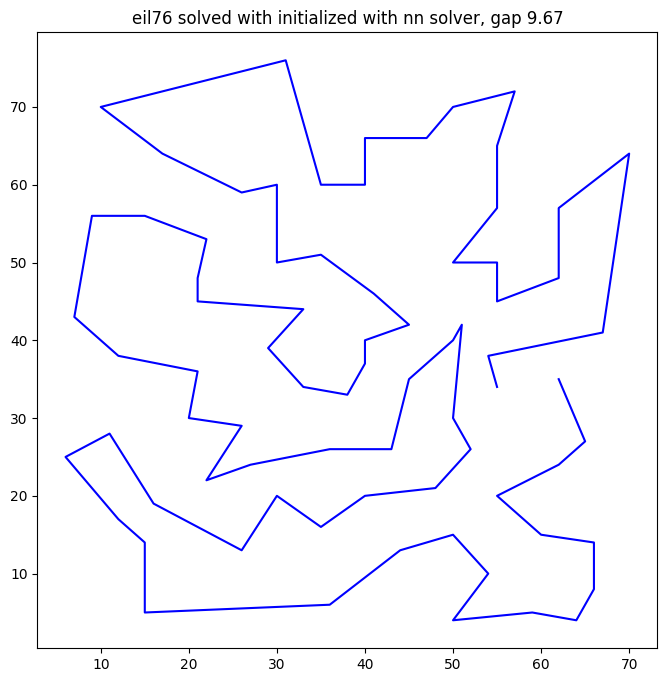

best solution with len 590.0 
with a total time of 2.26446 seconds
 9.67 % gap
with 10000 number of uncrossed edges
590.0 590.0


In [5]:
solver = SolverTSP("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2opt(solver.solution, p_inst)
# solution, new_length = twoOpt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

#assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")
print(compute_length(solver.solution, p_inst.dist_matrix), solver.found_length)

### 2.5opt

In [6]:
import numpy as np

def step2dot5opt(solution, matrix_dist, distance):
    seq_length = len(solution)
    tsp_sequence = np.array(solution)
    uncrosses = 0
    for i in range(1, seq_length - 1):
        for j in range(i + 2, seq_length - 1):
          #TODO
          # 2opt gain
          gain1 = gain(i,j, tsp_sequence, matrix_dist) 
          
          # node shift 1 gain
          s_gain1 = shift_gain1(i, j, tsp_sequence, matrix_dist)
          
          # node shift 2 gain
          s_gain2 = shift_gain2(i, j, tsp_sequence, matrix_dist)

          best_option = np.argmax([gain1, s_gain1, s_gain2])
          if [gain1, s_gain1, s_gain2][best_option] > 0:  
            if best_option == 0:
              new_distance = distance - gain1
              new_solution = swap2opt(tsp_sequence, i, j)
            elif best_option == 1:
              new_distance = distance - s_gain1
              new_solution = shift1(tsp_sequence, i, j)
            else:
              new_distance = distance - s_gain2
              new_solution = shift2(tsp_sequence, i, j)
            
            new_solution = np.roll(new_solution, np.random.randint(seq_length))
            return new_solution, new_distance, 1
            
          # END TODO
    return tsp_sequence, distance, uncrosses


def shift1(tsp_sequence, i, j):
  n = len(tsp_sequence)
  new_tsp_sequence = np.concatenate([tsp_sequence[:i], 
                                     tsp_sequence[i + 1 -n: j + 1 -n], 
                                     [tsp_sequence[i]], 
                                     tsp_sequence[j + 1 - n:]])
  return new_tsp_sequence


def shift_gain1(i, j, tsp_sequence, matrix_dist):
    n = matrix_dist.shape[0]
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] +
                    matrix_dist[tsp_sequence[i], tsp_sequence[i + 1 - n]] +
                    matrix_dist[tsp_sequence[j], tsp_sequence[j + 1 - n]])
    changed_links_len = (matrix_dist[tsp_sequence[i - 1], tsp_sequence[i + 1 - n]] +
                         matrix_dist[tsp_sequence[i], tsp_sequence[j]]
                         + matrix_dist[tsp_sequence[i], tsp_sequence[j + 1 - n]])
    return + old_link_len - changed_links_len


def shift2(tsp_sequence, i, j):
  n = len(tsp_sequence)
  new_tsp_sequence = np.concatenate([tsp_sequence[:i], 
                                     [tsp_sequence[j]], 
                                     tsp_sequence[i: j], 
                                     tsp_sequence[j + 1 - n:]])
  return new_tsp_sequence


def shift_gain2(i, j, tsp_sequence, matrix_dist):
  n = matrix_dist.shape[0]
  old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] +
                  matrix_dist[tsp_sequence[j], tsp_sequence[j - 1]] +
                  matrix_dist[tsp_sequence[j], tsp_sequence[j + 1 - n]])
  changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + 
                       matrix_dist[tsp_sequence[i], tsp_sequence[j]] +
                       matrix_dist[tsp_sequence[j - 1], tsp_sequence[j + 1 - n]])
  return + old_link_len - changed_links_len


def loop2dot5opt(solution, instance):
    matrix_dist = instance.dist_matrix
    actual_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    new_len = actual_len
    try_again = True
    while True:
      # TODO
      new_tsp_sequence, new_len, uncr_ = step2dot5opt(new_tsp_sequence, matrix_dist, actual_len)
      uncross += uncr_
      # print(new_len, actual_len)
      if new_len < actual_len:
        actual_len = new_len
        try_again = True
      else:
        if try_again:
          try_again = False
        else:
          return new_tsp_sequence.tolist(), new_len, uncross   

In [ ]:
def shift1(tsp_sequence, i, j):
  n = len(tsp_sequence)
  new_tsp_sequence = np.concatenate([tsp_sequence[:i], 
                                     tsp_sequence[i + 1 -n: j + 1 -n], 
                                     [tsp_sequence[i]], 
                                     tsp_sequence[j + 1 - n:]])
  return new_tsp_sequence


def shift2(tsp_sequence, i, j):
  n = len(tsp_sequence)
  new_tsp_sequence = np.concatenate([tsp_sequence[:i], 
                                     [tsp_sequence[j]], 
                                     tsp_sequence[i: j], 
                                     tsp_sequence[j + 1 - n:]])
  return new_tsp_sequence


t = ['x1', 'x2', 'x3', 'x4', 'y1', 'y2', 'y3']
i = 1
j = 3
shift1(t, i, j)
# n = len(t)
# t[:i], t[i + 1 -n: j + 1 -n], [t[i]], t[j + 1 - n:]

###  solving with nn  ####
###  solved  ####


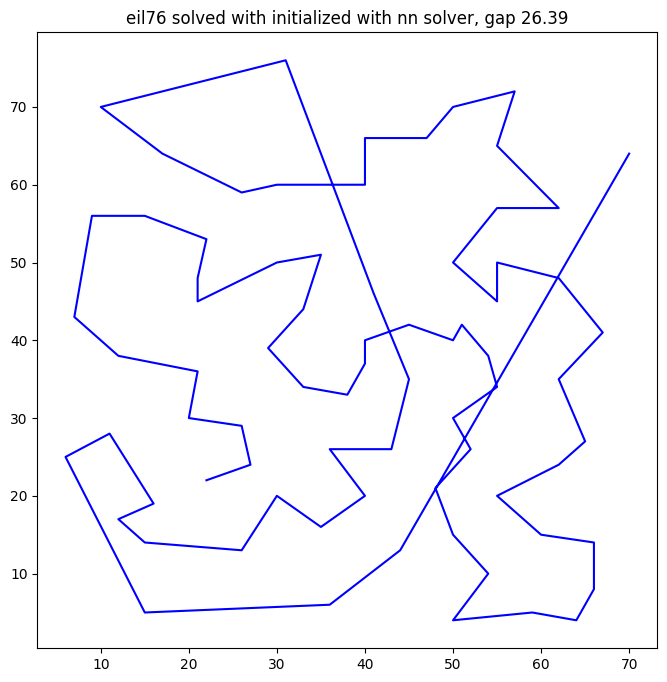

best solution with len 680.0 
with a total time of 0.0056 seconds
solution found has a 26.39 % gap
0.39926695823669434


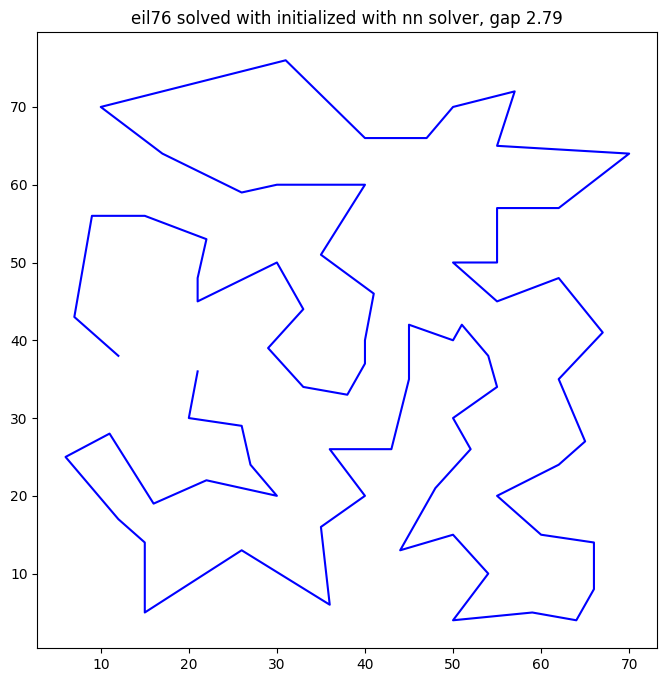

 2.79 % gap
with 28 number of uncrossed edges


In [7]:
solver = SolverTSP("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2dot5opt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

#assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### Let's analyse the performances of the optimizers and the algorithms discussed until now


###  solving with nn  ####
###  solved  ####


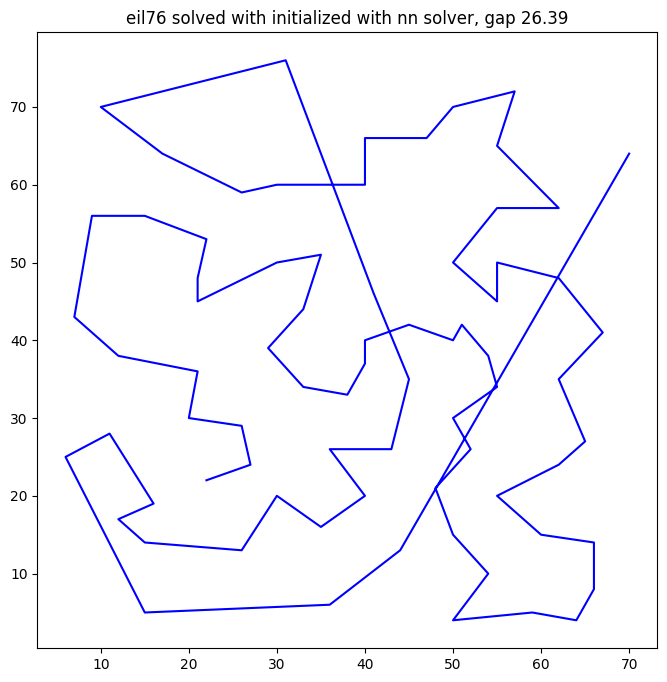

best solution with len 680.0 
with a total time of 0.00359 seconds
solution found has a 26.39 % gap
2.0710997581481934


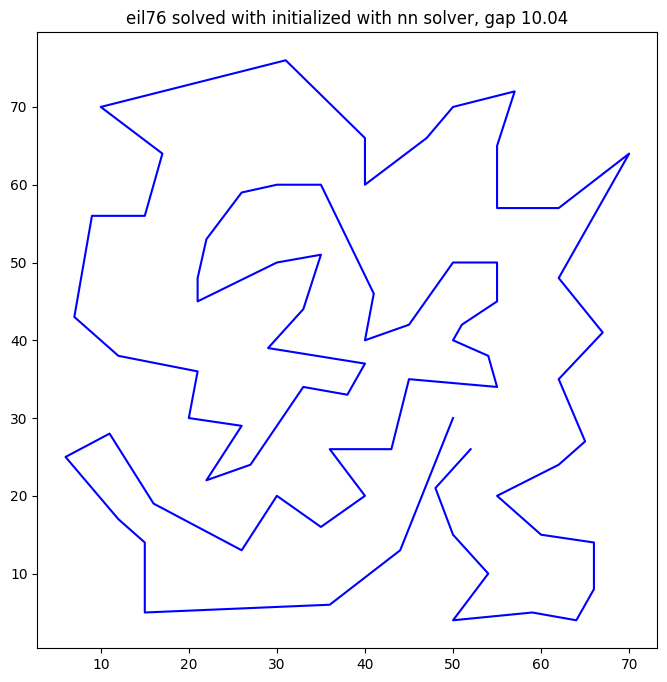

 10.04 % gap
with 10000 number of uncrossed edges
0.31134676933288574


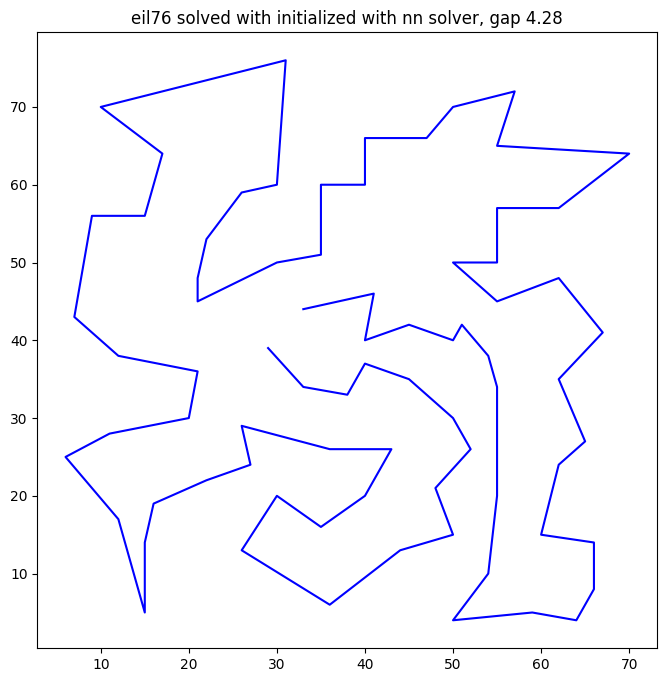

 4.28 % gap
with 28 number of uncrossed edges


In [8]:
solver = SolverTSP("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

old_solution=solver.solution


start = t()
solution, new_length, uncross = loop2opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

#assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

start = t()
solution, new_length, uncross = loop2dot5opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

#assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")